1 Cuales son los juegos mas exitosos?

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

1. Open files, review table's general information

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

In [7]:
# Open csv file
games_df = pd.read_csv('games.csv')

print('Vista general del dataset\n')
display(games_df.head())
print('\nInformacion general del dataset\n')
print(games_df.info())

Vista general del dataset



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Informacion general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


2. Data handling (modify ,clean, prepare)

In [33]:
# Modify column names to lowercase
games_df.columns = games_df.columns.str.lower()
print(games_df.columns)
# Change to correct datatype
games_df['year_of_release'] = games_df['year_of_release'].astype('int64')
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
games_df['user_score'] = games_df['user_score'].astype('float64')
games_df['critic_score'] = games_df['critic_score'].astype('Int64')
print(games_df.info())


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB
None


Column 'year_of_release' was modified for datatype int64 since only contains the year of release, no need to be float or to_datetime, column 'user_score' was modified to float64 since there are some users that provides float data and I wanted to keep them all scores count, also I handled the 'tbd' data by replacing to nan until I decide what to do with the missing values, and also modified 'critic_score' column because the score critics used only integer values not float values, so to handle properly in the future the datatype was changed to int64.

Critic median:  71.0
Critic mean:  70.01064911755908

Critic score left-skewed distribution



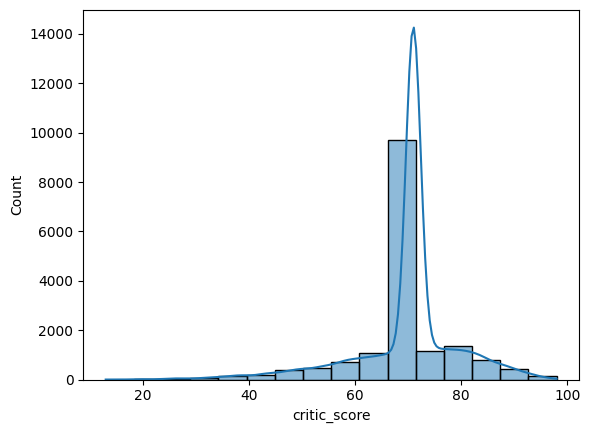

User median: 7.5
User mean: 7.329739754711337

User score left-skewed distribution



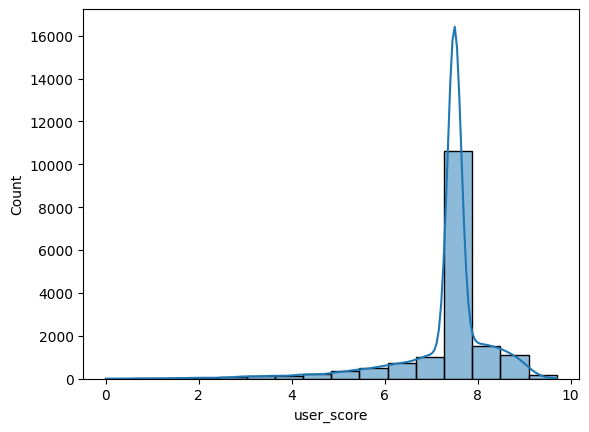

In [39]:
# Handle NaN, Null values
# Fill NaN values for median values
critic_median = games_df['critic_score'].median()
critic_mean = games_df['critic_score'].mean()

print('Critic median: ', critic_median)
print('Critic mean: ', critic_mean)

print('\nCritic score left-skewed distribution\n')
sns.histplot(games_df['critic_score'], kde=True)
plt.show()

games_df['critic_score'] = games_df['critic_score'].fillna(critic_median)

# Fill Null values for median values
user_median = games_df['user_score'].median()
user_mean = games_df['user_score'].mean()

print(f'User median: {user_median}')
print('User mean:', user_mean)

print('\nUser score left-skewed distribution\n')
sns.histplot(games_df['user_score'], kde=True)
plt.show()
games_df['user_score'] = games_df['user_score'].fillna(user_median)

# Fill Null values for 'Unknown'
games_df['rating'] = games_df['rating'].fillna('Unknown')


I decided to fill the Nan, Null values for the median on the critic_score and user_score columns due to the distribution is skewed to the left in both cases, so this mean that the median is more accurate value to represent the total scores, for the rating columns I just replace the Null values for the "unknown" value due to the rate is non numercal, unable to determine categorical rates, and for columns name and genre I just leave as they are since are a few rows with Null values, not a significant impact to the statistics.

In [44]:
# Calculate total sales by region for games
games_df['total_sales'] = (
    games_df['na_sales'] +
    games_df['eu_sales'] +
    games_df['jp_sales'] +
    games_df['other_sales']
    )

display(games_df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,Unknown,31.38
